In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import random

In [0]:
def MedianElim(eps_delta,arms_total = 10, total_runs= 50):    
  R_avg=[]
  opt_avg=[]


  def bandit1(i_true,qstar_arr):
    r = np.random.normal(qstar_arr[i_true],1)
    return r

  for runs in tqdm_notebook(range(total_runs)): 
    
    eps_med = eps_delta[0]
    delta_med = eps_delta[1]
    
    index = list(range(arms_total))

    qstar_arr = np.random.standard_normal(arms_total)
    true_best = np.argmax(qstar_arr,axis = 0) 

    Qarr = np.zeros(arms_total)
    R_arr=[]
    count = 0
    l = 0
    N_total = 0

    while len(Qarr)>1:
      l = l+1
      if l == 1:
        eps_med = eps_med/4
        delta_med = delta_med/2
      else:
        eps_med = 3*eps_med/4
        delta_med = delta_med/2  

      N_sampling=np.int(np.log(3/delta_med)/np.square(eps_med/2))  
      N_total =N_total+N_sampling
      for j in range(len(Qarr)):
        if l==1:
          count = 0
        for i in range(N_sampling):
          R = bandit1(index[j],qstar_arr)
          count=count+1
      
          Qarr[j] = Qarr[j] + (R-Qarr[j])/(count)
          R_arr.append(R)
          if runs == 0:
            R_avg.append(0)
      count = N_total    
      m = np.median(Qarr)
      Q= []
      ind= []

      for a,i in zip(Qarr,index):
        if a >= m:
          Q.append(a)
          ind.append(i)  

      Qarr = Q
      index = ind
    #while loop ended  
    for k in range(len(R_arr)):
      R_avg[k] = R_avg[k]+(R_arr[k]-R_avg[k])/(runs+1)
     
  
 
  return R_avg
      



In [0]:
def median_plots(R_avg):
  step_list = list(range(len(R_avg)))
  R_fig=plt.figure(figsize=(12,6)).add_subplot(111)
  colors = ['m', 'g', 'b', 'r', 'c','y', 'k']

  R_fig.plot(step_list, R_avg, colors[0])
  R_fig.title.set_text(r'Median Elimination : 10 arms')
  R_fig.set_ylabel('Average Reward')
  R_fig.set_xlabel('Steps')

  plt.show()


In [33]:
eps_delta = [0.1,0.1]
R_plot_m=MedianElim(eps_delta,10,200)


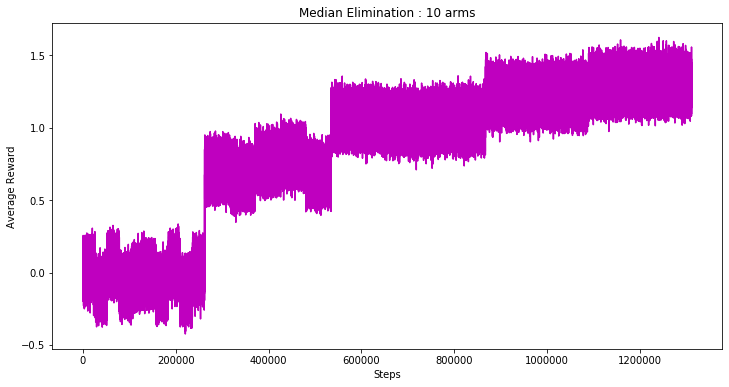

In [34]:
median_plots(R_plot_m)
